<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

$ \ $

## ***Name: Julián Uribe Castañeda***

## ***Course Final Project***

$ \ $

One of the main objectives of this course is to help you gain hands-on experience in communicating insightful and impactful findings to stakeholders. In this project you will use the tools and techniques you learned throughout this course to develop a few clustering models or dimension reduction transformations on a data set that you feel passionate about. Then, you will select the algorithm regression that best suits your needs, and communicate insights you found from your clustering or dimension reduction exercise.

After going through some guided steps, you will have insights that either group similar observations together or explain a data set in a projection of less dimensions.

Alternatively, you can revisit a Supervised Learning (regression or classification) model and confirm whether it is best to have one model for your entire data set, or to have one model for each cluster of your data set.

As a main deliverable, you will submit a report that helps you focus on highlighting your analytical skills, thought process, and next steps.



$ \ $

---

## ***Installing Required Libraries***

$ \ $

The following required libraries are pre-installed in the Skills Network Labs environment.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

-----

## ***Data set description***

$ \ $

$(1)$ This data set describes a set of transactions between accounts where the characteristics of the data frame are described as follows:

* $\color{lightblue}{\text{TX_ID :}}$ transaction identifier

* $\color{lightblue}{\text{SENDER_ACCOUNT_ID :}}$ origin account ID

* $\color{lightblue}{\text{RECEIVER_ACCOUNT_ID :}}$ destination account ID

* $\color{lightblue}{\text{TX_TYPE :}}$ Transaction type

* $\color{lightblue}{\text{TX_AMOUNT :}}$ Amount of the transaction

* $\color{lightblue}{\text{TIMESTAMP :}}$ Time identifier (days) - day 0 is considered to be a Sunday

* $\color{lightblue}{\text{IS_FRAUD :}}$ Fraudulent transaction identifier

* $\color{lightblue}{\text{ALERT_ID :}}$ Alert identifier



$ \ $

$(2)$ We download the dataset and read it into a Pandas dataframe.

In [3]:
url = '/content/trans.csv'
data = pd.read_csv(url, sep = ',', low_memory = False)
data

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,1,6456,9069,TRANSFER,465.05,0,False,-1
1,2,7516,9543,TRANSFER,564.64,0,False,-1
2,3,2445,9356,TRANSFER,598.94,0,False,-1
3,4,2576,4617,TRANSFER,466.07,0,False,-1
4,5,3524,1773,TRANSFER,405.63,0,False,-1
...,...,...,...,...,...,...,...,...
1048570,1048571,2503,6452,TRANSFER,413.57,158,False,-1
1048571,1048572,3726,9223,TRANSFER,198.53,158,False,-1
1048572,1048573,3726,1469,TRANSFER,198.53,158,False,-1
1048573,1048574,3726,3708,TRANSFER,198.53,158,False,-1


$ \ $

$(3)$ We check if the columns have empty values or of type Nan and apparently there are none.

In [4]:
nan_count = data.isnull().sum()
empty_count = (data == '').sum()

for column in data.columns:
    nan_values = nan_count[column]
    empty_values = empty_count[column]
    print(f"Column '{column}': NaN values = {nan_values}, Empty values = {empty_values}", "\n")

Column 'TX_ID': NaN values = 0, Empty values = 0 

Column 'SENDER_ACCOUNT_ID': NaN values = 0, Empty values = 0 

Column 'RECEIVER_ACCOUNT_ID': NaN values = 0, Empty values = 0 

Column 'TX_TYPE': NaN values = 0, Empty values = 0 

Column 'TX_AMOUNT': NaN values = 0, Empty values = 0 

Column 'TIMESTAMP': NaN values = 0, Empty values = 0 

Column 'IS_FRAUD': NaN values = 0, Empty values = 0 

Column 'ALERT_ID': NaN values = 0, Empty values = 0 



from this we notice that there are apparently no empty or Nan values.

$ \ $

$(4)$ We describe the data type of the features.

In [5]:
data.dtypes

TX_ID                    int64
SENDER_ACCOUNT_ID        int64
RECEIVER_ACCOUNT_ID      int64
TX_TYPE                 object
TX_AMOUNT              float64
TIMESTAMP                int64
IS_FRAUD                  bool
ALERT_ID                 int64
dtype: object

$ \ $

$(5)$ Let's start by looking at the distributions of some of the features.

$ \ $

> $(a)$ "TX_AMOUNT".

In [6]:
# How is the distribution of the initial amounts in the accounts?
data["TX_AMOUNT"].value_counts()

165.66       1424
7.91         1284
195.19       1232
130.36       1168
8.23         1148
             ... 
77568.92        1
108965.77       1
24612.87        1
43564.37        1
684284.31       1
Name: TX_AMOUNT, Length: 38368, dtype: int64

In [7]:
# statistical distributions of the initial amounts.
data["TX_AMOUNT"].describe()

count    1.048575e+06
mean     2.981197e+04
std      3.920322e+05
min      0.000000e+00
25%      2.399000e+01
50%      1.567200e+02
75%      4.395400e+02
max      2.147484e+07
Name: TX_AMOUNT, dtype: float64

$ \ $

> $(b)$ "ALERT_ID".

In [8]:
# How is the distribution of the alert type
data["ALERT_ID"].value_counts()

-1      1047246
 213          5
 327          5
 315          5
 303          5
         ...   
 390          1
 199          1
 297          1
 63           1
 367          1
Name: ALERT_ID, Length: 306, dtype: int64

In [9]:
#
data["ALERT_ID"].describe()

count    1.048575e+06
mean    -7.326839e-01
std      8.564559e+00
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%     -1.000000e+00
max      3.980000e+02
Name: ALERT_ID, dtype: float64

$ \ $

> $(c)$ "IS_FRAUD".

In [10]:
# How is the distribution of the fraud type
data["IS_FRAUD"].value_counts()

False    1047246
True        1329
Name: IS_FRAUD, dtype: int64

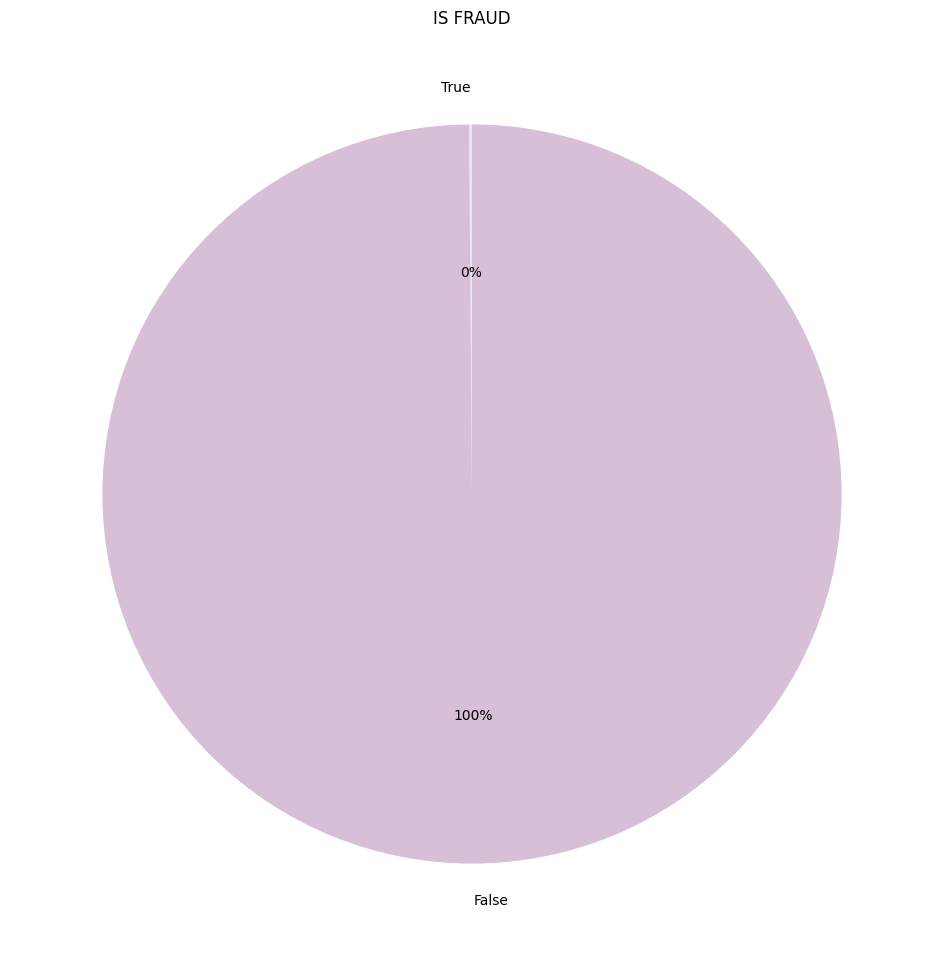

In [11]:
# describimos una mascara que describa los renglones del data frame que contienen solo hombres
mask_fraud = (data["IS_FRAUD"] == True)

# mostramos el numero de renglones del dataframe que solo tiene hombres
fraud = data[mask_fraud].shape[0]

# describimos una mascara que describa los renglones del data frame que contienen solo mujeres
mask_nofraud = (data["IS_FRAUD"] == False)

# mostramos el numero de renglones del dataframe que solo tiene mujeres
no_fraud = data[mask_nofraud].shape[0]

plt.figure(figsize = (20,12))

# describimos un grafico de torta que muestre una comparativa entre el numero de hombres y mujeres
plt.pie([fraud, no_fraud],
         labels = ['True', 'False'],
         startangle = 90,
         autopct = '%1.f%%',
         colors = ['lavender', 'thistle'])

# describimos el titulo del grafico
plt.title('IS FRAUD')

# mostramos en pantalla nuestra imagen creada
plt.show()

$ \ $

$(6)$ We delete the characteristics that are not relevant in our analysis.

In [12]:
data.drop(['TX_ID', 'TX_TYPE'], axis = 1, inplace = True)
data

,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,6456,9069,465.05,0,False,-1
1,7516,9543,564.64,0,False,-1
2,2445,9356,598.94,0,False,-1
3,2576,4617,466.07,0,False,-1
4,3524,1773,405.63,0,False,-1
...,...,...,...,...,...,...
1048570,2503,6452,413.57,158,False,-1
1048571,3726,9223,198.53,158,False,-1
1048572,3726,1469,198.53,158,False,-1
1048573,3726,3708,198.53,158,False,-1


$ \ $

$(7)$  What percentage of the transactions were marked as fraudulent?

According to the following code, we have:

* $99.87\%$ of the transactions were marked as non-fraudulent.

* $0.13\%$ of the transactions were marked as fraudulent.

In [13]:
data["IS_FRAUD"].value_counts(normalize=True)

False    0.998733
True     0.001267
Name: IS_FRAUD, dtype: float64

In [14]:
data["IS_FRAUD"].value_counts()

False    1047246
True        1329
Name: IS_FRAUD, dtype: int64

$ \ $

$(8)$ What can be said about the amounts of the transactions that were marked as fraudulent?

Several things can be said about the code shown below:

* There were only $1329$ frauds and $1047246$ were not fraud.

* The average value of each fraud was $9.84$ dollars.

* The maximum value of the fraud was $19.92$ dollars and the minimum value was $2.6$ dollars.


In [15]:
mask = data["IS_FRAUD"] == True
data[mask]["TX_AMOUNT"].describe()

count    1329.000000
mean        9.843988
std         5.880948
min         2.600000
25%         3.830000
50%        10.600000
75%        15.320000
max        19.920000
Name: TX_AMOUNT, dtype: float64

In [16]:
mask = data["IS_FRAUD"] == False
data[mask]["TX_AMOUNT"].describe()

count    1.047246e+06
mean     2.984979e+04
std      3.922794e+05
min      0.000000e+00
25%      2.430000e+01
50%      1.570700e+02
75%      4.400000e+02
max      2.147484e+07
Name: TX_AMOUNT, dtype: float64

$ \ $

$(9)$ We transform the data ***data['IS_FRAUD']*** into numerical data.

In [17]:
le = LabelEncoder()
data['IS_FRAUD'] = le.fit_transform(data['IS_FRAUD'])

$ \ $

$(10)$ The ***'ALERT_ID'*** and ***'IS_FRAUD'*** features are closely related. For this reason, since we consider these variables are linearly dependent, then we are not going to consider the variable ***'ALERT_ID'*** as an explanatory variable.

In [18]:
no_fraud = data["IS_FRAUD"] == 0
data[no_fraud]["ALERT_ID"].value_counts()

-1    1047246
Name: ALERT_ID, dtype: int64

In [19]:
fraud = data["IS_FRAUD"]== 1
data[fraud]["ALERT_ID"].value_counts()

248    5
340    5
303    5
315    5
225    5
      ..
390    1
199    1
297    1
63     1
367    1
Name: ALERT_ID, Length: 305, dtype: int64

$ \ $

$(10)$ From the previous analysis, I infer that the features

* ***'SENDER_ACCOUNT_ID'***,

* ***'TX_AMOUNT'***,

* ***'TIMESTAMP'***

are the explanatory variables that describe the data frame of transfers to detect if there is fraud or not. For this reason, we only consider this features.

In [20]:
data = data[['SENDER_ACCOUNT_ID', 'TX_AMOUNT',	'TIMESTAMP', 'IS_FRAUD']]
data

,SENDER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,IS_FRAUD
0,6456,465.05,0,0
1,7516,564.64,0,0
2,2445,598.94,0,0
3,2576,466.07,0,0
4,3524,405.63,0,0
...,...,...,...,...
1048570,2503,413.57,158,0
1048571,3726,198.53,158,0
1048572,3726,198.53,158,0
1048573,3726,198.53,158,0


$ \ $

$(11)$ We performs the clustering process using the K-means (km) algorithm with 20 clusters. The characteristics "TX_AMOUNT" (transaction amount), "TIMESTAMP" (time stamp) and "IS_FRAUD" (fraud indicator) of the data set are used.

In [46]:
# Create an instance of the KMeans model with 20 clusters and a random seed (random_state = 42) for reproducibility.
km = KMeans(n_clusters=20, random_state=42)

# We select the features 'TX_AMOUNT', 'TIMESTAMP' and 'IS_FRAUD' from dataset 'data' and store them in DataFrame 'X'.
X = data[['TX_AMOUNT', 'TIMESTAMP', 'IS_FRAUD']]

# We apply the K-means (km) algorithm to the 'X' data. The model finds 20 clusters based on the selected features.
# The data will be assigned to one of the 20 clusters based on their similarity to the centroids of each cluster.
km.fit(X)

KMeans(n_clusters=20, random_state=42)

$ \ $

$(12)$ We created a scatterplot to visualize the relationship between the 'TIMESTAMP' (time stamp) and 'IS_FRAUD' (fraud indicator) features in the data set, using the result of the clustering performed previously with the K-means algorithm.

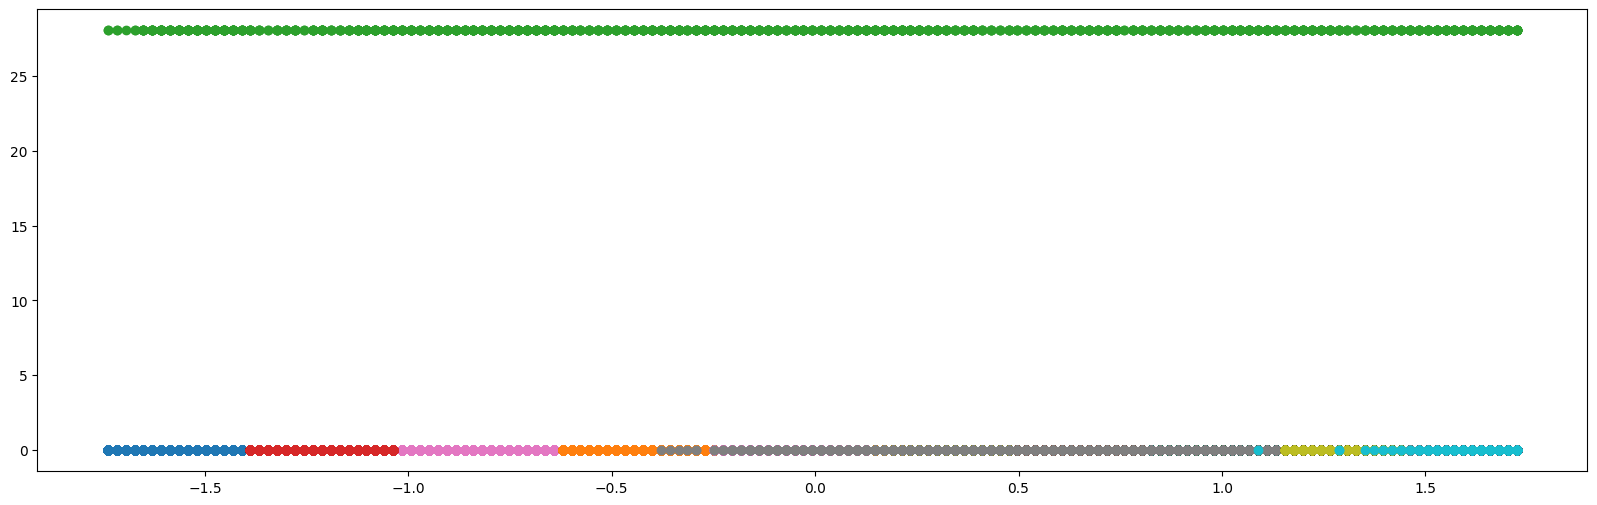

In [62]:
# Creamos una figura de tamaño 20x6 pulgadas para el gráfico.
plt.figure(figsize=(20, 6))

# Iteramos sobre las etiquetas únicas en los resultados del clustering (km.labels_).
# Cada etiqueta representa un cluster diferente.
for label in np.unique(km.labels_):

    # Creamos una máscara que selecciona los datos que pertenecen al cluster actual.
    mascara = (label == km.labels_)

    # Creamos un nuevo DataFrame 'X_' que contiene solo los datos correspondientes al cluster actual.
    X_ = X[mascara]

    # Extraemos las columnas 'TIMESTAMP' y 'IS_FRAUD' del sub-DataFrame 'X_' para usarlas en el gráfico de dispersión.
    x = X_['TIMESTAMP']
    y = X_['IS_FRAUD']

    # Creamos un gráfico de dispersión con las coordenadas 'x' (TIMESTAMP) y 'y' (IS_FRAUD) del sub-DataFrame 'X_'.
    # El gráfico de dispersión mostrará la relación entre estas dos características para el cluster actual.
    plt.scatter(x, y, label=label)

# Mostramos el gráfico de dispersión en pantalla con los diferentes clusters diferenciados por colores.
plt.show()

$ \ $

$(13)$ We create a scatterplot to visualize the relationship between the 'TIMESTAMP' (time stamp) and 'TX_AMOUNT' (transaction amount) features in the data set, using the result of the clustering performed previously with the K-means algorithm.

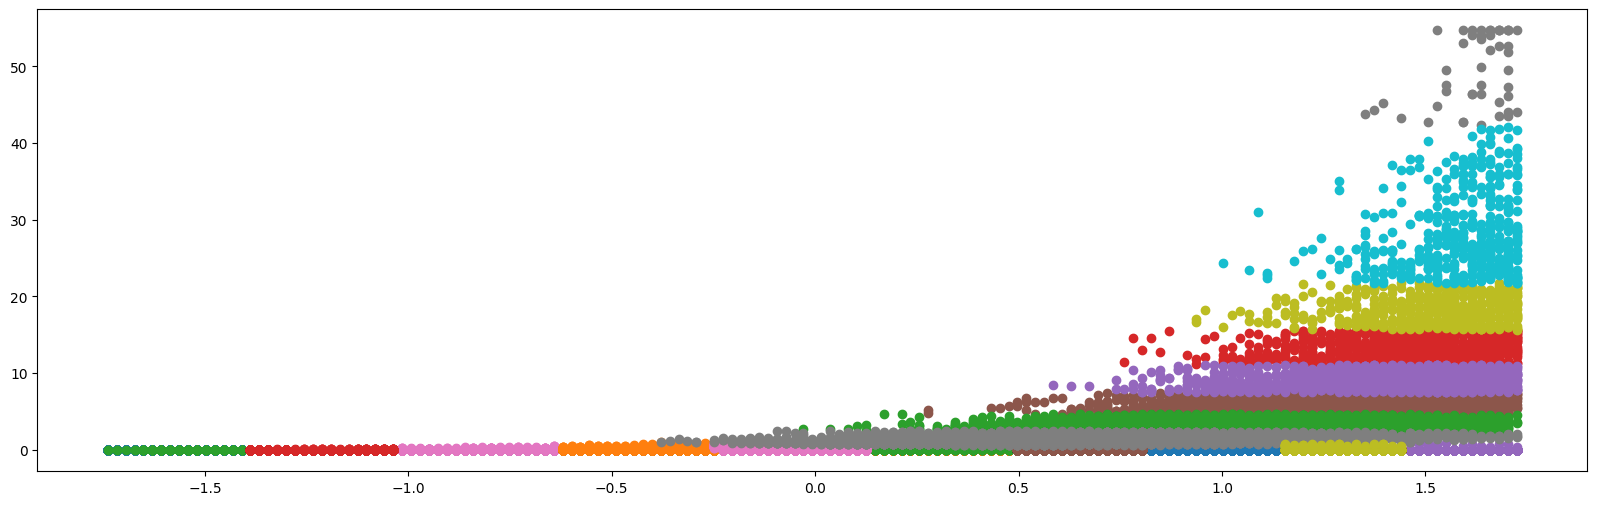

In [63]:
# Creamos una figura de tamaño 20x6 pulgadas para el gráfico.
plt.figure(figsize=(20, 6))

# Iteramos sobre las etiquetas únicas en los resultados del clustering (km.labels_).
# Cada etiqueta representa un cluster diferente.
for label in np.unique(km.labels_):

    # Creamos una máscara que selecciona los datos que pertenecen al cluster actual.
    mascara = (label == km.labels_)

    # Creamos un nuevo DataFrame 'X_' que contiene solo los datos correspondientes al cluster actual.
    X_ = X[mascara]

    # Extraemos las columnas 'TIMESTAMP' y 'TX_AMOUNT' del sub-DataFrame 'X_' para usarlas en el gráfico de dispersión.
    x = X_['TIMESTAMP']
    y = X_['TX_AMOUNT']

    # Creamos un gráfico de dispersión con las coordenadas 'x' (TIMESTAMP) y 'y' (TX_AMOUNT) del sub-DataFrame 'X_'.
    # El gráfico de dispersión mostrará la relación entre estas dos características para el cluster actual.
    plt.scatter(x, y, label=label)

# Mostramos el gráfico de dispersión en pantalla con los diferentes clusters diferenciados por colores.
plt.show()

$ \ $


then, it is easy to notice that in the following points marked with orange there is inconsistency and possibly there is fraud here

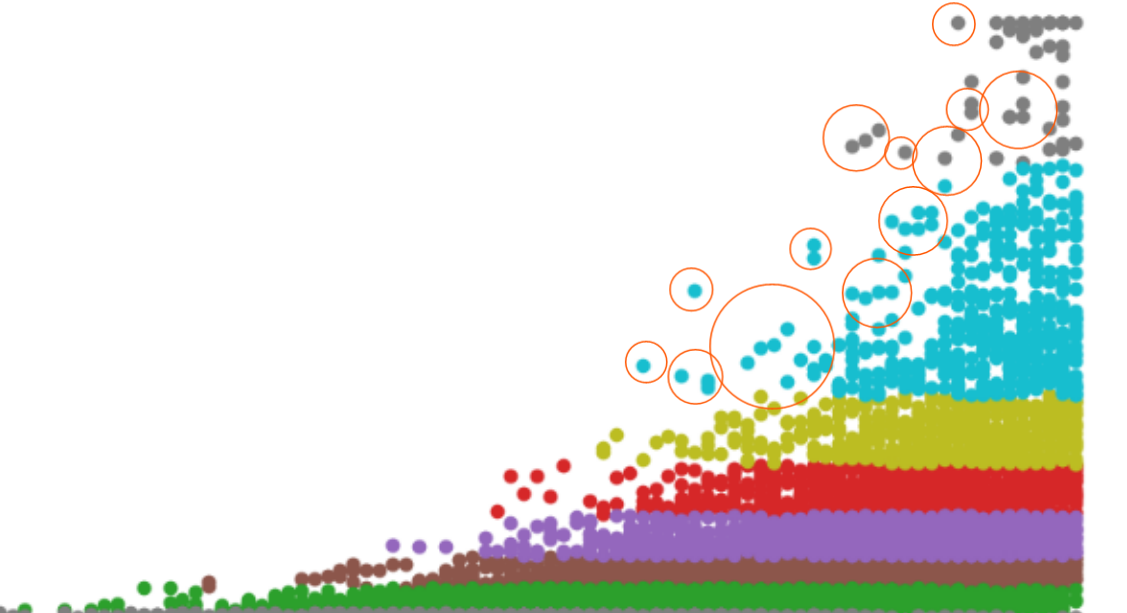

$ \ $

$(14)$ We create a figure with two subplots in 3D format to visualize the data from the data set using the result of the clustering performed with the K-means algorithm.

$\blacktriangleright$ But this plot is difficult to interpret, since most transactions are not due to fraud.

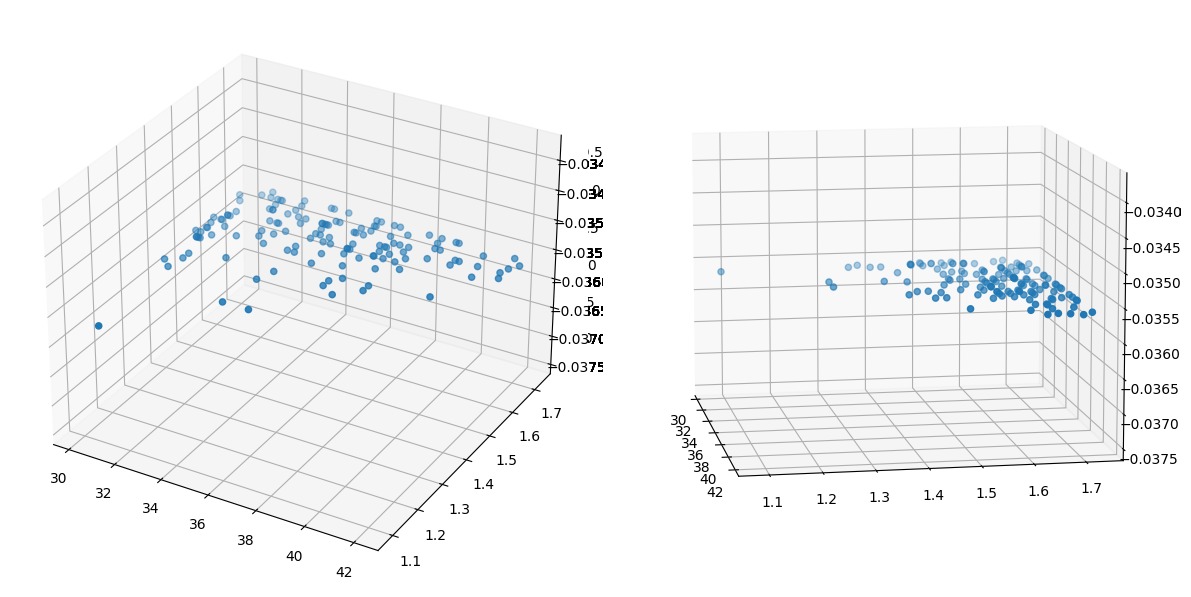

In [64]:
# We create a shape of size 12x12 inches for the graph.
fig = plt.figure(figsize=(12, 12))

# We iterate over the unique labels in the clustering results (km.labels_).
# Each label represents a different cluster.
for label in np.unique(km.labels_):

     # We create a mask that selects the data belonging to the current cluster.
     mask = (label == km.labels_)

     # We create a new DataFrame 'X_' that contains only the data corresponding to the current cluster.
     X_ = X[mask]

     # Extract the 'TX_AMOUNT', 'TIMESTAMP' and 'IS_FRAUD' columns from the 'X_' sub-DataFrame for use in the three-dimensional scatterplot.
     x = X_["TX_AMOUNT"]
     y = X_["TIMESTAMP"]
     z = X_["IS_FRAUD"]

     # This line creates a subplot at position (1, 2, 1) of the figure and sets it to display a three-dimensional (3D) plot.
     # The option projection='3d' indicates that a 3D plot is desired. The variable ax1 is used to refer to this subplot.
     ax1 = fig.add_subplot(121, projection='3d', label=label)

     # This line draws a three-dimensional scatterplot on the ax1 subplot with the coordinates specified by x, y, and z.
     # Each point on the graph represents a financial transaction and is colored according to the cluster to which it belongs.
     ax1.scatter(x, y, z, label=label)

     # This line creates another subplot at position (1, 2, 2) of the figure and sets it to display a three-dimensional (3D) plot.
     # The variable ax2 is used to refer to this subframe.
     ax2 = fig.add_subplot(122, projection='3d', label=label)

     # This line sets the view of the 3D graph to the ax2 subframe.
     # The elev and azim parameters specify the elevation angle and azimuth angle, respectively,
     # to determine how the chart looks from different perspectives.
     ax2.view_init(elev=10, azim=-10)

     # This line draws a three-dimensional scatterplot on the ax2 subplot with the coordinates specified by x, y, and z.
     # Each point on the graph represents a financial transaction and is colored according to the cluster to which it belongs.
     ax2.scatter(x, y, z, label=label)

# We automatically adjust the spacing between graphics and figure margins so everything displays correctly.
plt.tight_layout()

# We show the graph on the screen, which contains two subplots with different 3D views of the data grouped by clusters.
plt.show()